# Exercises of talk 5
### [Alvaro Gonzalez Hernandez](https://alvarogohe.github.io/), 27th May 2025


In this practical session, we are going to be coding the problem that we discussed at the start of the talk: how to use kernels to solve non-linear classification problems.

The techniques used to divide a set of observations in the decision space using hyperplanes are usually referred to as **Support Vector Machines** (abbreviated as SVMs). The reason why they are called that way is because what they do is to maximise the distance of the hyperplane to the **support vectors**, which are the data points that are closest to the decision surface.

## Learning how to use SVMs in Python
We start by importing the libraries that we will need for this exercise:

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Now, we are going to generate the data that we will use for the exercise. We will use the `make_moons` function from `sklearn.datasets`, which generates a two-dimensional dataset with a non-linear decision boundary.

In [2]:
# Generate synthetic 2D data (nonlinear)
X, y = make_moons(n_samples=200, noise=0.2, random_state=13)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)  # We use the train_test_split function to split the dataset into training and testing sets.

The function `SVC` from `sklearn.svm` implements the Support Vector Machine algorithm. It takes as arguments the kernel to be used, the regularisation parameter $C$, and the degree of the polynomial kernel if it is used. The regularisation parameter $C$ is related to the $\lambda$ that we explained in the talk and controls the trade-off between maximizing the margin, which is the distance to the support vectors and minimising the classification error. A small value of $C$ will result in a larger margin but may misclassify some points, while a large value of $C$ will result in a smaller margin but will classify all points correctly.

In [3]:
# Here are some examples of SVM kernels that can be used for classification tasks:
kernels = {
    "Linear": SVC(kernel="linear", C=1),
    "Polynomial (degree=7)": SVC(kernel="poly", degree=7, C=1),
    "RBF (γ=1)": SVC(kernel="rbf", gamma=1, C=1),
}

Recall that we use `fit` to train the model and `predict` to make predictions. We can compute the accuracy of the model by comparing the predicted labels with the true labels using the `accuracy_score` function from `sklearn.metrics`.

In [4]:
## We see that the accuracy of the linear kernel is 85%
linkernel = SVC(kernel="linear", C=1)
linkernel.fit(X_train, y_train)
y_pred = linkernel.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)

0.85


Let's now plot the decision boundary of the SVM model. We will create a `plot_decision_boundary` function to visualize the decision boundary.

In [5]:
# Plot decision boundary
def plot_decision_boundary(ker, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = ker.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors="k")
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.tight_layout()
    plt.show()

Now, we can compare how the three types of kernels compare in terms of accuracy and decision boundary.

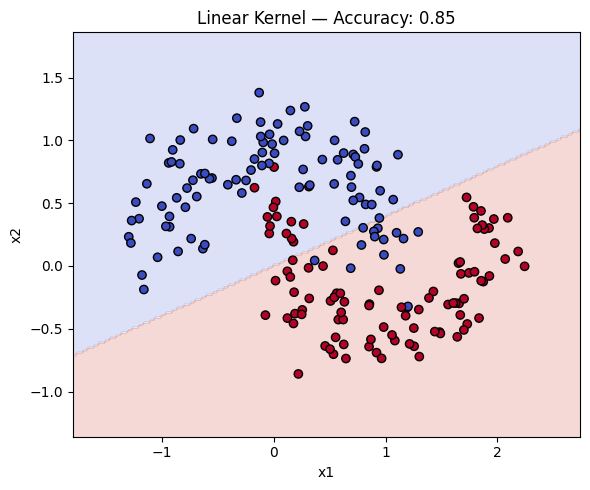

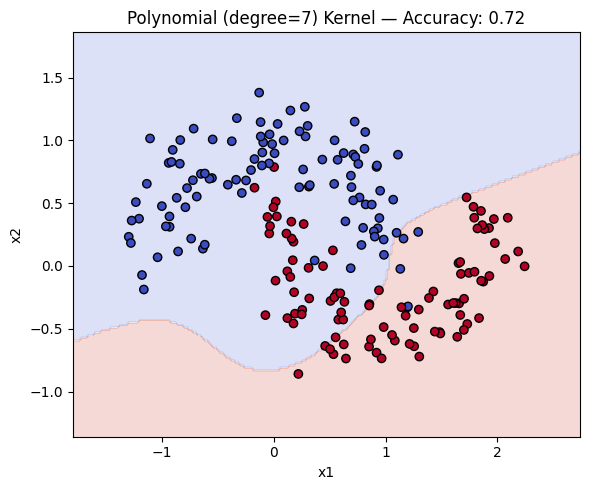

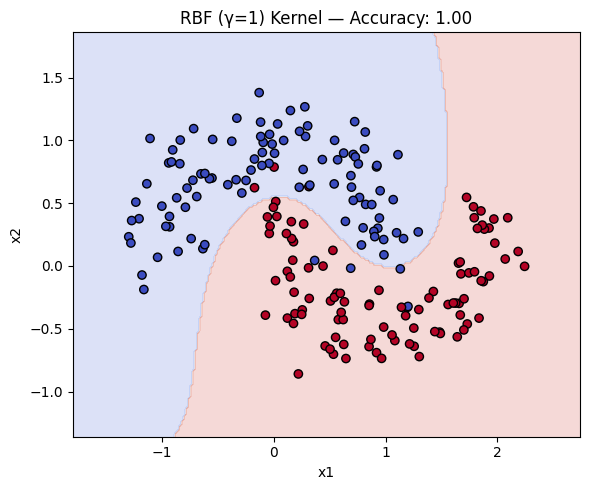

In [6]:
for name, ker in kernels.items():
    ker.fit(X_train, y_train)
    y_pred = ker.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    plot_decision_boundary(ker, X, y, f"{name} Kernel — Accuracy: {acc:.2f}")

# Now it's your turn!

For this exercise session, we are going to compute the decision boundary of a Support Vector Machine using different kernels. We are going to generate the data from a picture. In this case, our image is the Warwick logo, and we are going to sample the points according to whether they are black or white pixels in the image. Feel free to use any image you like!


> **Note**: To work with images, we'll use the `scikit-image` package, which we import using the name `skimage`. 
>
> As in talk 1, you can install this using the `pip` package manager (for most users, just type `pip install scikit-image` in your terminal, just like we did at the start of the reading group).

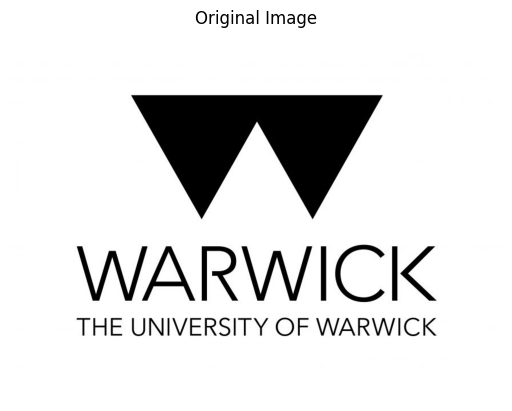

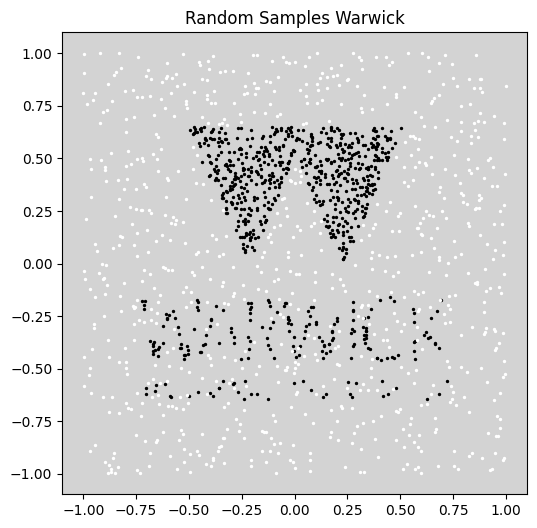

In [10]:
from skimage import io, color
from skimage.filters import gaussian

# Load image
img = io.imread("warwick.jpg")  # should be a black-and-white silhouette
plt.imshow(img)
plt.axis("off")
plt.title("Original Image")
plt.show()

# Convert to grayscale
gray = color.rgb2gray(img)

# Apply Gaussian blur so the edges are not too sharp
gray = gaussian(gray, sigma=1)

# Threshold to get a binary mask
threshold = 0.3
maskb = gray < threshold  # black = foreground
maskw = gray > 1 - threshold  # white = foreground

# Get coordinates of black pixels
coordsb = np.column_stack(np.where(maskb))
coordsw = np.column_stack(np.where(maskw))

# Rescale both coordsb and coordsw to the same [-1, 1] square using global min/max
all_coords = np.vstack([coordsb, coordsw]).astype(float)
min0, max0 = all_coords[:, 0].min(), all_coords[:, 0].max()
min1, max1 = all_coords[:, 1].min(), all_coords[:, 1].max()

coordsb = coordsb.astype(float)
coordsw = coordsw.astype(float)
coordsb[:, 0] = 2 * (coordsb[:, 0] - min0) / (max0 - min0) - 1
coordsb[:, 1] = 2 * (coordsb[:, 1] - min1) / (max1 - min1) - 1
coordsw[:, 0] = 2 * (coordsw[:, 0] - min0) / (max0 - min0) - 1
coordsw[:, 1] = 2 * (coordsw[:, 1] - min1) / (max1 - min1) - 1

# The orientation is questionable, so we flip the axes
dum = coordsb.copy()
coordsb[:, 0] = dum[:, 1]
coordsb[:, 1] = -1 * dum[:, 0]
dum = coordsw.copy()
coordsw[:, 0] = dum[:, 1]
coordsw[:, 1] = -1 * dum[:, 0]

# Subsample randomly from both sets of coordinates
n_points = 800  # This is the number of points to sample from each set
idxb = np.random.choice(len(coordsb), size=n_points, replace=False)
idxw = np.random.choice(len(coordsw), size=n_points, replace=False)
XB = coordsb[idxb]
XW = coordsw[idxw]

# Visualise
plt.figure(figsize=(6, 6))
plt.scatter(XB[:, 0], XB[:, 1], s=2, color="black")  # note flipped axes
plt.scatter(XW[:, 0], XW[:, 1], s=2, color="white")  # note flipped axes
plt.title("Random Samples Warwick")
plt.axis("equal")
plt.gca().set_facecolor("lightgray")  # or any color you prefer, e.g. "#f0f0f0"
plt.show()

### Exercise 1
Now that we have generated the data, let's try to train the models. We have two arrays, `XB` and `XW` that contain the coordinates of the black and white pixels, respectively. Your first task is to produce training and testing sets from these arrays. You can use the `train_test_split` function from `sklearn.model_selection` to do this. It takes as arguments two arrays $X$ with the data and $y$ with the labels of $X$; the test size, and a random state (that is used for reproducibility). 

To compute $X$ and $y$, you may find useful to use the following functions: 
<ul>
<li>

`np.vstack` and `np.hstack` can be used to stack arrays vertically and horizontally, respectively. 
</li>

<li>

`np.zeros` and `np.one` can be used to produce arrays of length $n$ with only zeros or ones, respectively. 
</li>


In [ ]:
# Create training data from XB (label 0) and XW (label 1)
X = __
print(X)
y = __
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=__, random_state=__)

### Exercise 2

Let's now compare how different kernels perform on this dataset. More specifically, we will compare how does the polynomial kernel perform with different degrees. First, we will create a dictionary containing all polynomial kernels of degrees from 1 to 10. 

More specifically, what I want is a dictionary whose keys are "Polynomial of degree d" and the values are the SVM models with the polynomial kernel of degree $d$, with $d$ ranging from 1 to 10.

In [ ]:
# Create a dictionary of polynomial kernels with different degrees.
polykernels = {"__": SVC(kernel="__", degree=__) for d in __}
print(polykernels)

### Exercise 3
Let's do a table with the accuracy of each model. You can use the `pandas` library to create a data frame with the results. The data frame should have two columns: "Kernel" and "Accuracy". The "Kernel" column should contain the name of the kernel, and the "Accuracy" column should contain the accuracy of the model.

In [ ]:
# Create a data frame to store the name and accuracy of each kernel.
import pandas as pd

results = __
for name, ker in polykernels.items():
    __.fit(__, __)  # Fit the model
    y_pred = __.predict(__)  # Predict the labels for the test set
    acc = accuracy_score(__, __)  # Compute the accuracy
    results.append(
        {"Kernel": __, "Accuracy": __}
    )  # Add starting rows of the data frame
df_results = pd.DataFrame(__)
print(__)

### Exercise 4

Finally, we will plot the decision boundaries of the models in the dictionary. You can use the `plot_decision_boundary` function that we defined earlier to do this.

In [14]:
# Make a plot with the decision boundaries of each of the polynomial kernels that includes the name and the accuracy.
for name, ker in polykernels.items():
    ker.fit(__, __)
    y_pred = ker.predict(__)
    acc = accuracy_score(__, __)
    plot_decision_boundary(ker, X, y, f"{__} — Accuracy: {__:.2f}")

Finally, a geometric question to reflect on: why do you think the kernels with odd degrees perform better than the kernels with even degrees? What is the reason behind this?

You can also experiment with the different kernels and see how they perform on the dataset. You can also try to change the regularisation parameter $C$ and see how it affects the decision boundary.

<div style="height: 100px;"></div>

<hl>

# Solutions


### Exercise 1

In [15]:
# Create training data from XB (label 0) and XW (label 1)
X = np.vstack([XB, XW])
print(X)
y = np.hstack([np.zeros(len(XB)), np.ones(len(XW))])
print(y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

[[-0.33641618  0.31278891]
 [-0.60924855 -0.24191063]
 [ 0.0982659   0.51617874]
 ...
 [ 0.97456647 -0.14021572]
 [ 0.90520231 -0.13097072]
 [ 0.49364162  0.15562404]]
[0. 0. 0. ... 1. 1. 1.]


### Exercise 2

In [16]:
# Create a dictionary of polynomial kernels with different degrees
polykernels = {
    f"Polynomial of degree {d}": SVC(kernel="poly", degree=d) for d in range(1, 11)
}
print(polykernels)

{'Polynomial of degree 1': SVC(degree=1, kernel='poly'), 'Polynomial of degree 2': SVC(degree=2, kernel='poly'), 'Polynomial of degree 3': SVC(kernel='poly'), 'Polynomial of degree 4': SVC(degree=4, kernel='poly'), 'Polynomial of degree 5': SVC(degree=5, kernel='poly'), 'Polynomial of degree 6': SVC(degree=6, kernel='poly'), 'Polynomial of degree 7': SVC(degree=7, kernel='poly'), 'Polynomial of degree 8': SVC(degree=8, kernel='poly'), 'Polynomial of degree 9': SVC(degree=9, kernel='poly'), 'Polynomial of degree 10': SVC(degree=10, kernel='poly')}


### Exercise 3

In [17]:
import pandas as pd

results = []
for name, ker in polykernels.items():
    ker.fit(X_train, y_train)
    y_pred = ker.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append({"Kernel": name, "Accuracy": acc})
df_results = pd.DataFrame(results)
print(df_results)

                    Kernel  Accuracy
0   Polynomial of degree 1  0.606250
1   Polynomial of degree 2  0.809375
2   Polynomial of degree 3  0.678125
3   Polynomial of degree 4  0.831250
4   Polynomial of degree 5  0.603125
5   Polynomial of degree 6  0.834375
6   Polynomial of degree 7  0.593750
7   Polynomial of degree 8  0.815625
8   Polynomial of degree 9  0.571875
9  Polynomial of degree 10  0.809375


### Exercise 4

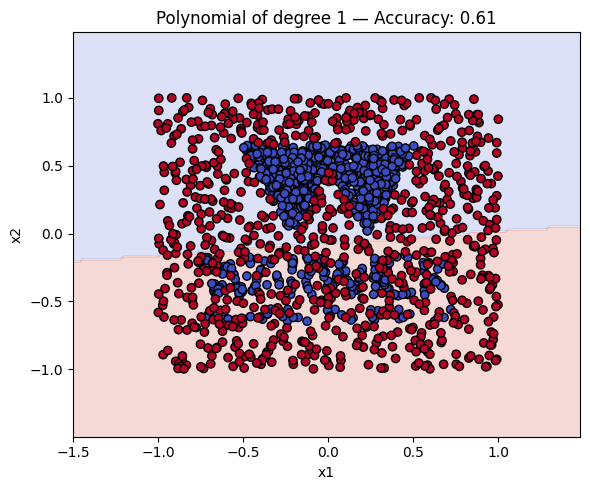

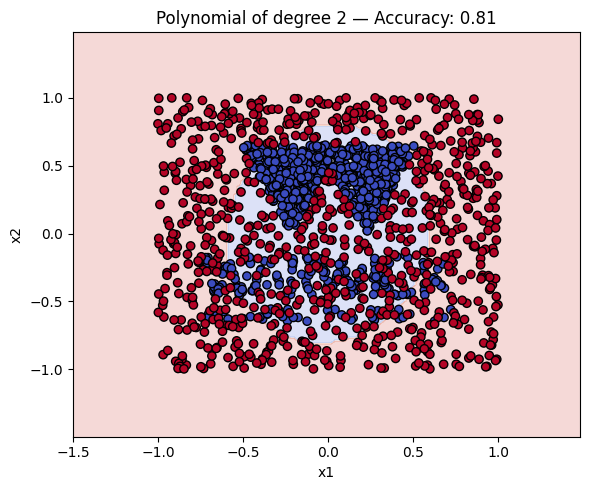

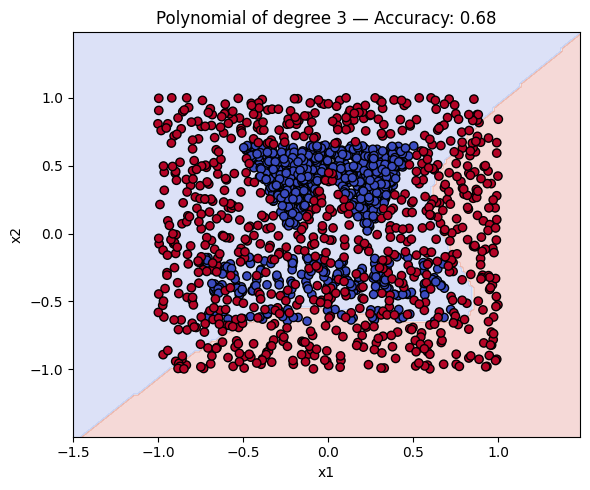

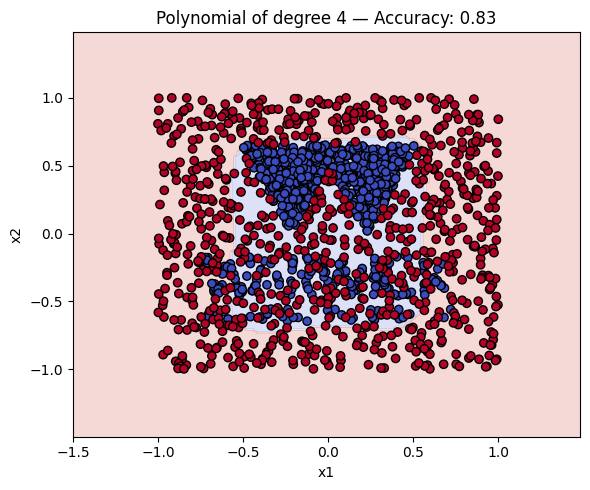

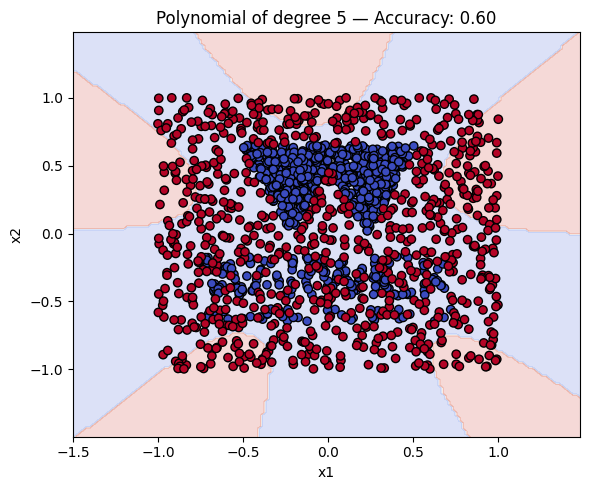

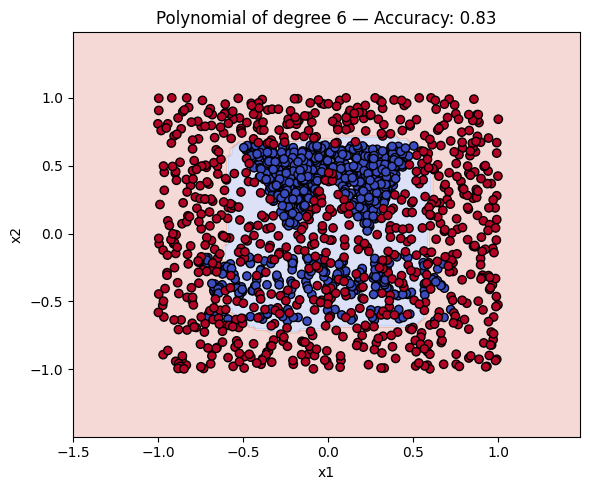

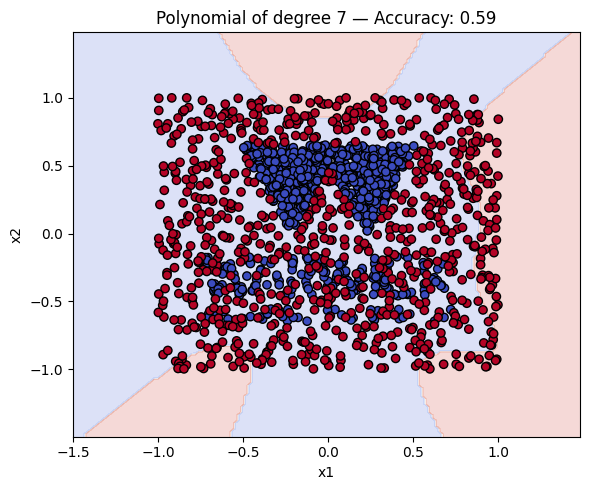

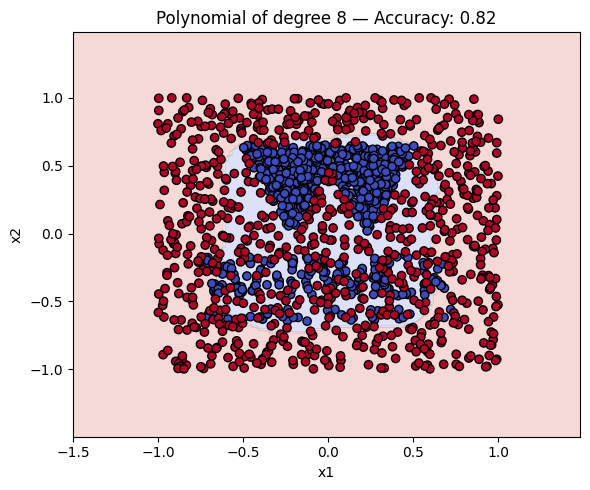

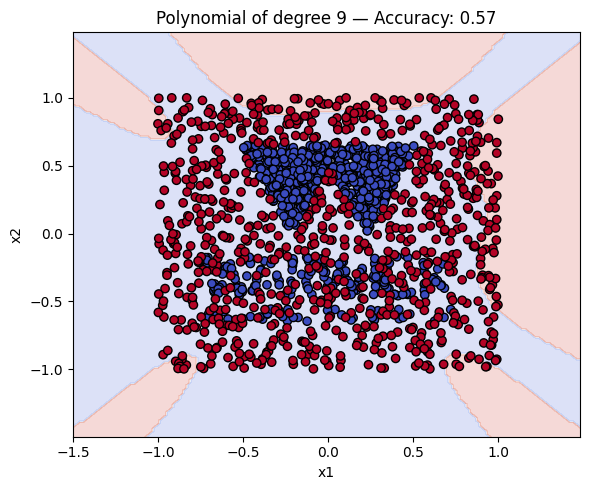

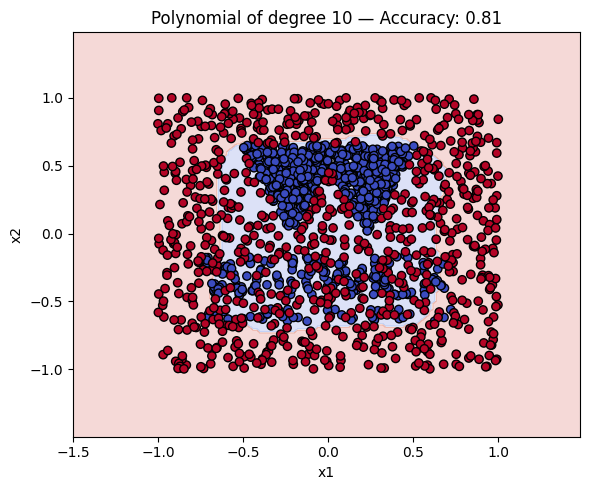

In [18]:
# Make a plot with the decision boundaries of each of the polynomial kernels that includes the name and the accuracy.
for name, ker in polykernels.items():
    ker.fit(X_train, y_train)
    y_pred = ker.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    plot_decision_boundary(ker, X, y, f"{name} — Accuracy: {acc:.2f}")